In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os
path = '/content/gdrive/MyDrive/MachineVision/samples'

In [ ]:
import sys
import cv2 as cv
import numpy as np
from google.colab.patches import cv_imshow



src = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.bilateralFilter(src, -1, 10, 5)

cv2_imshow(src)
cv2_imshow(dst)
cv2.waitKey()

cv2.destroyAllWindows()

img = cv.imread('gdrive/MyDrive/MachineVision/Re4/sejong.bmp')

#gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#gray = np.float32(gray)
#dst = cv.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
#dst_ = cv.normalize(dst, None, 255, 0, cv.NORM_MINMAX, cv.CV_8UC1)
#img[dst>0.01*dst.max()]=[0,0,255]
#cv_imshow(dst_)
cv_imshow(img)

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv_imshow
img = cv.imread('gdrive/MyDrive/MachineVision/samples/lanes.bmp',cv.IMREAD_GRAYSCALE)
Ix = cv.Sobel(img,ddepth=cv.CV_64F,dx=1,dy=0,ksize=3)
Iy = cv.Sobel(img,ddepth=cv.CV_64F,dx=0,dy=1,ksize=3)
mag = np.sqrt(np.square(Ix) + np.square(Iy))
ori = np.arctan2(Iy,Ix) * 180/np.pi 

# For display only
Ix_ = (Ix-Ix.min()) / (Ix.max()-Ix.min()) * 255
Iy_ = (Iy-Iy.min()) / (Iy.max()-Iy.min()) * 255
mag_ = (mag-mag.min()) / (mag.max()-mag.min()) * 255
ori_ = (ori-ori.min()) / (ori.max()-ori.min()) * 255
cv_imshow(Ix_)
cv_imshow(Iy_)
cv_imshow(mag_)
cv_imshow(ori_)

Output hidden; open in https://colab.research.google.com to view.

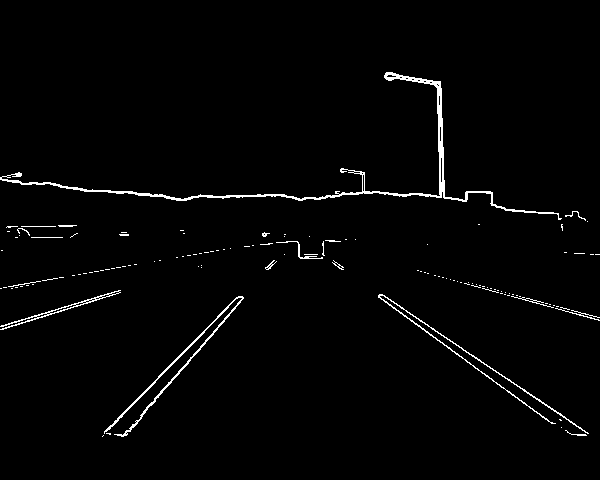

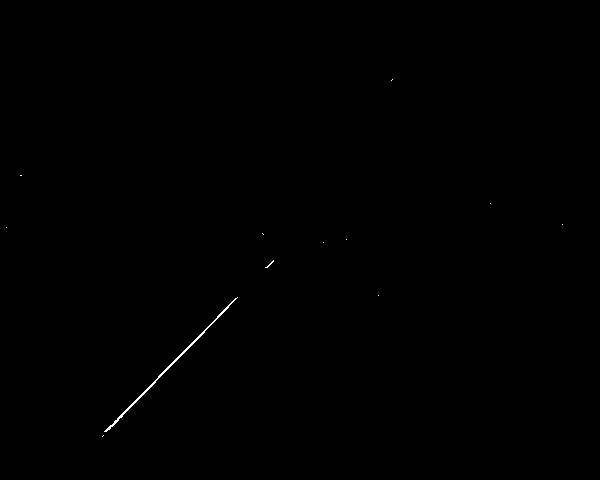

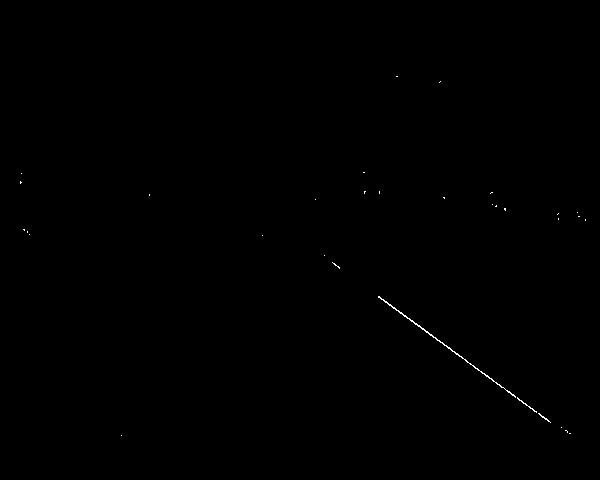

In [ ]:
result1 = np.zeros(img.shape)
id1 = np.where(mag>100)
result1[id1] = 255
result2 = np.zeros(img.shape)
id2 = np.where((mag>100) & (ori>30) & (ori<60))
result2[id2] = 255
result3 = np.zeros(img.shape)
id3 = np.where((mag>100) & (ori>-60) & (ori<-30))
result3[id3] = 255
cv_imshow(result1)
cv_imshow(result2)
cv_imshow(result3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f(x,a,b):
  return a*x+b
def ransac_line_fiting(x,y,r,t):
  iter = np.round(np.log(1-0.999) / np.log(1-(1-r)**2) + 1)
  num_max = 0
  for i in np.arange(iter):
    id = np.random.permutation(len(x))
    xs = x[id[:2]]
    ys = y[id[:2]]
    A = np.vstack([xs, np.ones(len(xs))]).T
    ab = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, ys))
    dist = np.abs(ab[0]*x-y+ab[1])/np.sqrt(ab[0]**2+1)
    numInliers = sum(dist < t)
    if numInliers > num_max:
      ab_max = ab
      num_max = numInliers
  return ab_max, num_max


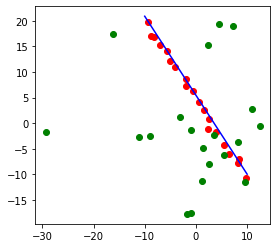

In [ ]:
a, b = -1.5, 5
x = np.linspace(-10, 10, 20)
y = f(x,a,b)
xn = x + 0.5*np.random.normal(size=len(x))
yn = y + 0.5*np.random.normal(size=len(y))
xo = 10*np.random.normal(size=len(x))
yo = 10*np.random.normal(size=len(x))

xno = np.concatenate((xn,xo))
yno = np.concatenate((yn,yo))

abno, max = ransac_line_fiting(xno,yno,0.5,2)




plt.plot(xn, yn, 'or')
plt.plot(xo, yo, 'og')
plt.plot(x, f(x,abno[0],abno[1]), '-b')
plt.gca().set_aspect('equal')
plt.show()

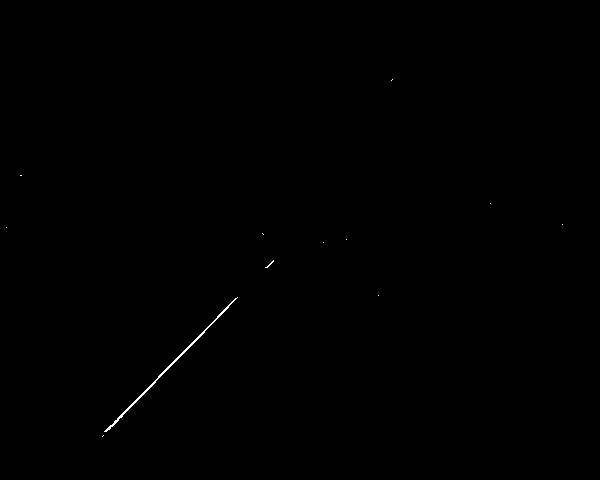

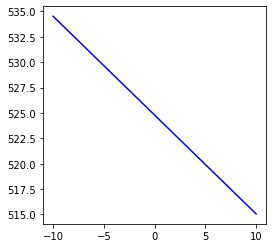

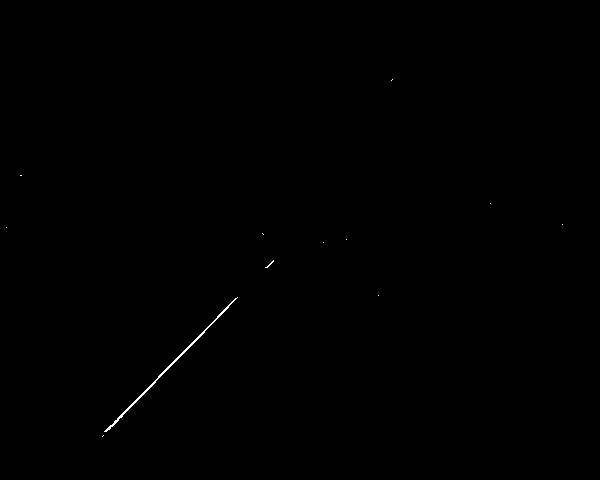

In [ ]:
#import cv2
cv_imshow(result2)

abno,max = ransac_line_fiting(id2[0],id2[1],0.5,2)
plt.plot(x, f(x,abno[0],abno[1]), '-b')
plt.gca().set_aspect('equal')
plt.show()

#cv2.line(result2, (0, 0), (511, 511), (255, 0, 0), 5)
cv_imshow(result2)
#cv_imshow(lineimg2)

In [ ]:
#이미지 정리용
img = cv.imread('gdrive/MyDrive/MachineVision/samples/lanes.bmp') #cv.IMREAD_GRAYSCALE)
result1 = np.zeros(img.shape)
id1 = np.where(mag>100)
result1[id1] = 255
result2 = np.zeros(img.shape)
id2 = np.where((mag>100) & (ori>30) & (ori<60))
result2[id2] = 255
result3 = np.zeros(img.shape)
id3 = np.where((mag>100) & (ori>-60) & (ori<-30))
result3[id3] = 255
#cv_imshow(result1)
#cv_imshow(result2)
#cv_imshow(result3)

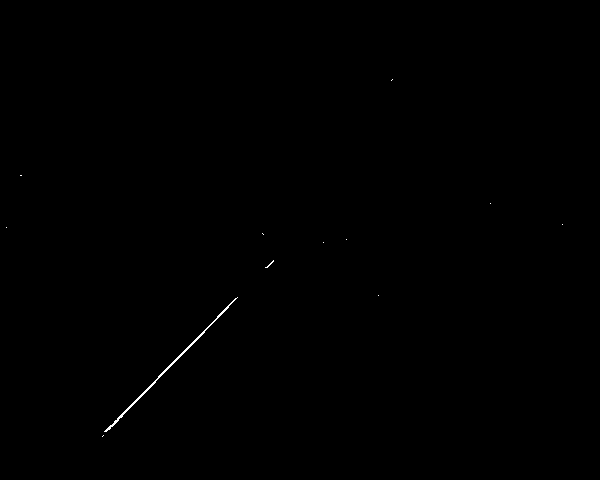

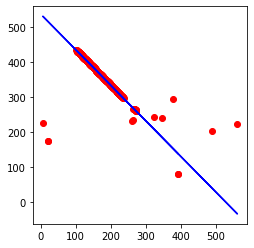

399
391 139.98412698412926
106 429.50793650793776


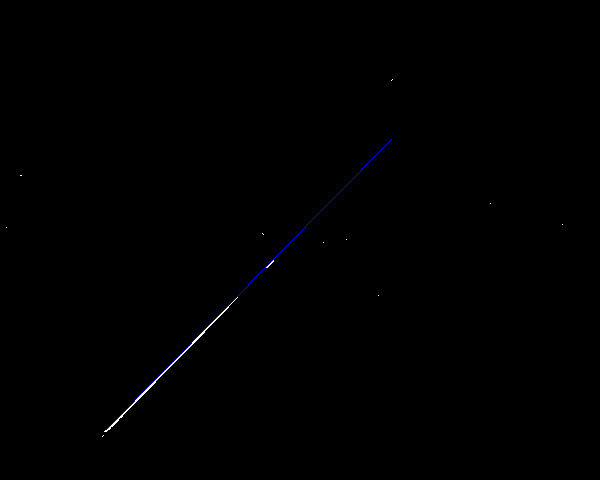

In [ ]:
cv_imshow(result2)
xno = id2[1]
yno = id2[0]
abno, max = ransac_line_fiting(xno,yno,0.05,2)
#plt.plot(xn, yn, 'or')
#plt.plot(xo, yo, 'og')
plt.plot(xno,yno, 'or')
plt.plot(xno, f(xno,abno[0],abno[1]), '-b')
plt.gca().set_aspect('equal')
plt.show()
#xno[1], f(xno[1],abno[0],abno[1])


print(max)
print(xno[1], f(xno[1],abno[0],abno[1]))
print(xno[max], f(xno[max],abno[0],abno[1]))

#lineimg=cv.line(result2, (xno[1],yno[1]), (xno[max],yno[max]), (255, 0, 0), 3)
lineimg=cv.line(result2,(xno[1], int(f(xno[1],abno[0],abno[1]))),(xno[max], int(f(xno[max],abno[0],abno[1]))) , (255, 0, 0), 1)
cv_imshow(lineimg)


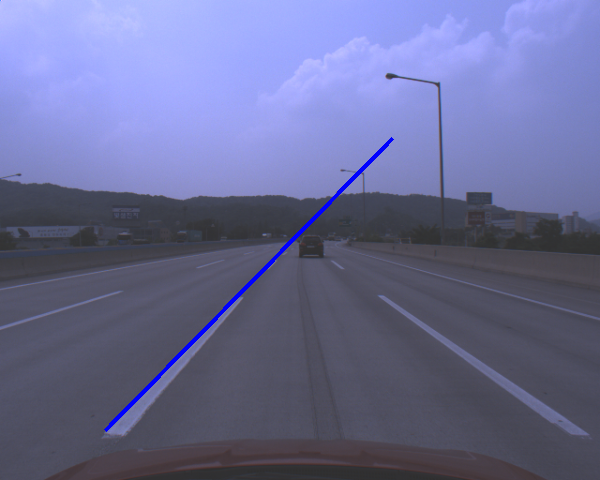

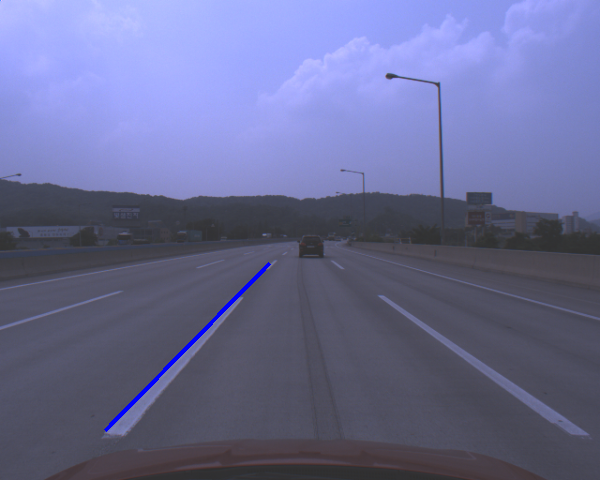

In [ ]:
img = cv.imread('gdrive/MyDrive/MachineVision/samples/lanes.bmp')
lineoriimg=cv.line(img,(xno[1], int(f(xno[1],abno[0],abno[1]))),(xno[max], int(f(xno[max],abno[0],abno[1]))) , (255, 0, 0), 3)
cv_imshow(lineoriimg)
img = cv.imread('gdrive/MyDrive/MachineVision/samples/lanes.bmp')
lineoriimg=cv.line(img,(xno[20], int(f(xno[20],abno[0],abno[1]))),(xno[max], int(f(xno[max],abno[0],abno[1]))) , (255, 0, 0), 3)
cv_imshow(lineoriimg)

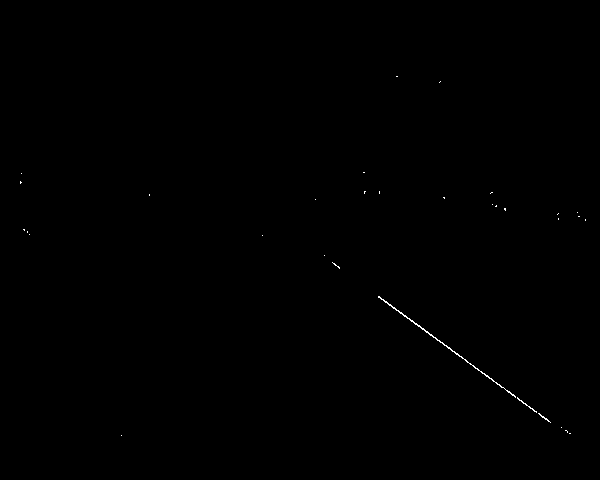

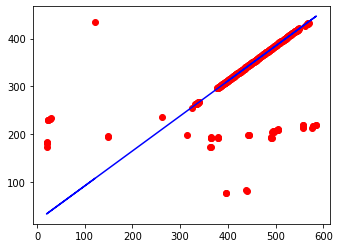

322
397 309.0666666667262
522 400.73333333348


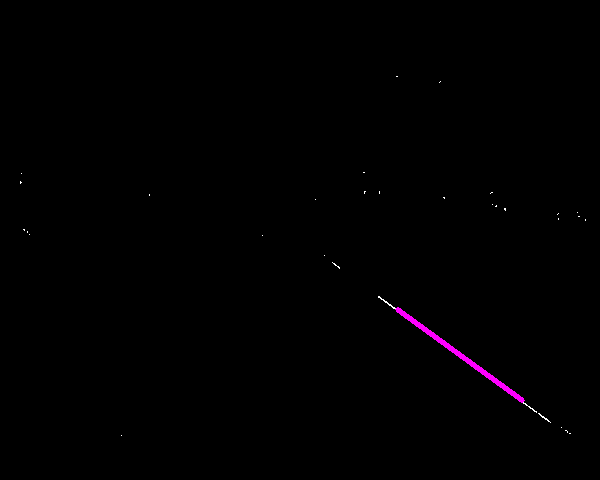

In [ ]:
cv_imshow(result3)
xno = id3[1]
yno = id3[0]
abno, max = ransac_line_fiting(xno,yno,0.5,2)
#plt.plot(xn, yn, 'or')
#plt.plot(xo, yo, 'og')
plt.plot(xno,yno, 'or')
plt.plot(xno, f(xno,abno[0],abno[1]), '-b')
plt.gca().set_aspect('equal')
plt.show()
#xno[1], f(xno[1],abno[0],abno[1])


print(max)
print(xno[1], f(xno[1],abno[0],abno[1]))
print(xno[max], f(xno[max],abno[0],abno[1]))

#lineimg=cv.line(result2, (xno[1],yno[1]), (xno[max],yno[max]), (255, 0, 0), 3)
lineimg2=cv.line(result3,(xno[1], int(f(xno[1],abno[0],abno[1]))),(xno[max], int(f(xno[max],abno[0],abno[1]))) , (255, 0, 255), 3)
cv_imshow(lineimg2)

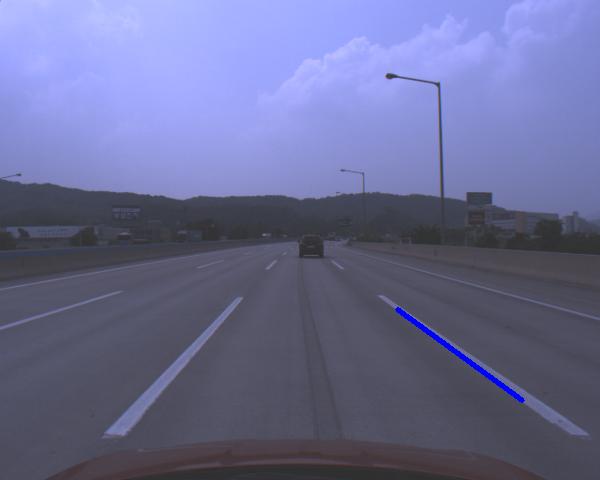

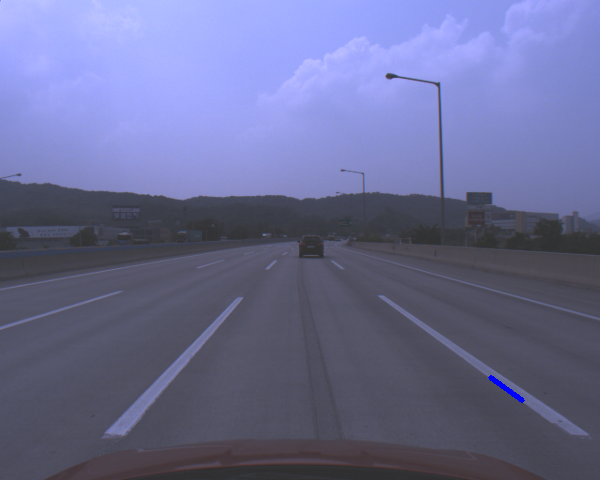

In [ ]:
img = cv.imread('gdrive/MyDrive/MachineVision/samples/lanes.bmp')
lineoriimg=cv.line(img,(xno[1], int(f(xno[1],abno[0],abno[1]))),(xno[max], int(f(xno[max],abno[0],abno[1]))) , (255, 0, 0), 3)
cv_imshow(lineoriimg)


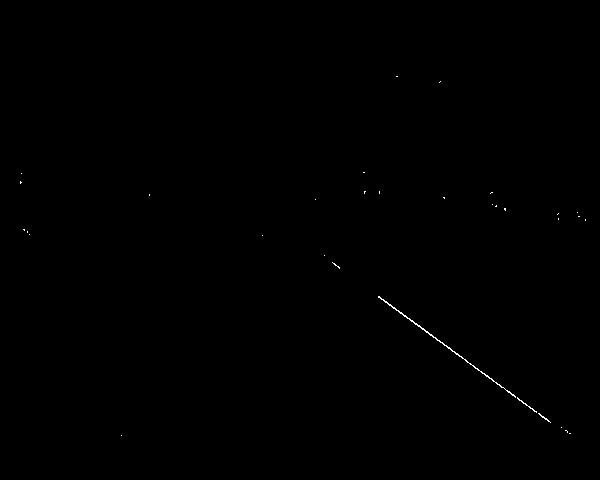

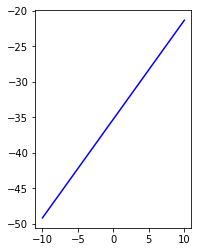

In [ ]:
cv_imshow(result3)

abno,max = ransac_line_fiting(id3[0],id3[1],0.5,2)
plt.plot(x, f(x,abno[0],abno[1]), '-b')
plt.gca().set_aspect('equal')
plt.show()